<a href="https://colab.research.google.com/github/jaiindian1/MOkshaAi/blob/main/cofee17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Citi Markets Quant Report ---
Fair Futures Price: $1.218
Call Option Price:  $0.068
Avg Simulated Price: $1.210


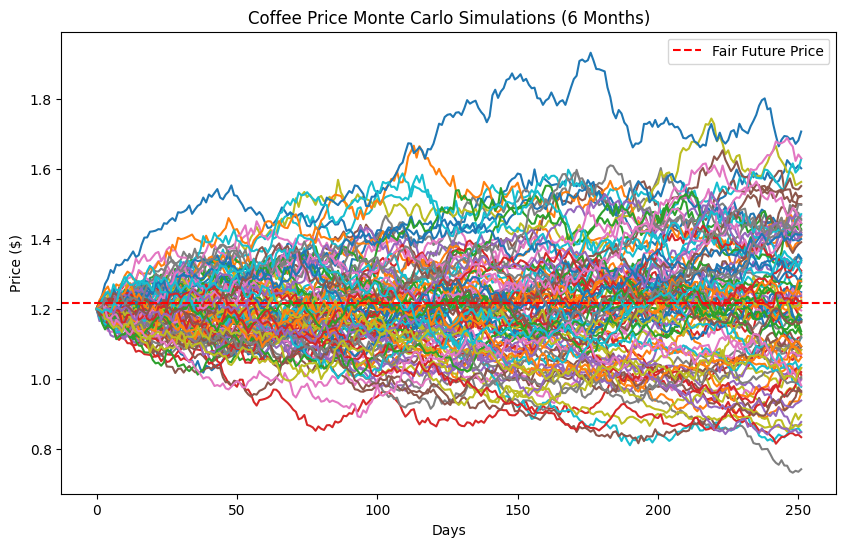

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- 1. SETTING GLOBAL PARAMETERS ---
S_0 = 1.20      # Current Spot Price ($/lb)
r = 0.02        # Risk-free rate (2%)
d = 0.01        # Storage cost (1%)
sigma = 0.25    # Volatility (25%)
T = 0.5         # Time to maturity (6 months)
X = 1.25        # Strike Price for Option

# --- 2. COST OF CARRY MODEL (Futures Pricing) ---
# Formula: F = S * e^((r+d)*T)
F_t = S_0 * np.exp((r + d) * T)

# --- 3. BLACK-SCHOLES MODEL (Call Option Pricing) ---
d1 = (np.log(S_0 / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
call_price = S_0 * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)

# --- 4. MONTE CARLO SIMULATION (Price Path Forecasting) ---
num_simulations = 10000
num_steps = 252  # Trading days in 6 months
dt = T / num_steps

np.random.seed(42) # Reproducibility
price_paths = np.zeros((num_steps, num_simulations))
price_paths[0] = S_0

for t in range(1, num_steps):
    z = np.random.standard_normal(num_simulations)
    # Geometric Brownian Motion formula
    price_paths[t] = price_paths[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

# --- 5. RESULTS & OUTPUTS ---
print(f"--- Citi Markets Quant Report ---")
print(f"Fair Futures Price: ${F_t:.3f}")
print(f"Call Option Price:  ${call_price:.3f}")
print(f"Avg Simulated Price: ${np.mean(price_paths[-1]):.3f}")

# Visualize the first 100 simulations
plt.figure(figsize=(10,6))
plt.plot(price_paths[:, :100])
plt.axhline(y=F_t, color='r', linestyle='--', label='Fair Future Price')
plt.title("Coffee Price Monte Carlo Simulations (6 Months)")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

In [2]:
import numpy as np
from scipy.stats import norm

# ==========================================
# 1. INPUT DATA (Market Parameters)
# ==========================================
S_t = 1.20      # Current Spot Price ($ per lb)
r = 0.02        # Risk-free rate (2% per annum)
d = 0.01        # Storage cost (1% per annum)
T = 0.5         # Time to maturity (6 months)
X = 1.25        # Strike Price
sigma = 0.25    # Volatility (25%)

# ==========================================
# 2. COST OF CARRY MODEL
# ==========================================
# Formula: F = S * exp((r + d) * T)
F_t = S_t * np.exp((r + d) * T)

# ==========================================
# 3. BLACK-SCHOLES MODEL (Theoretical)
# ==========================================
# Calculate helpers d1 and d2
d1 = (np.log(S_t / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculate final call option price
bs_call_price = (S_t * norm.cdf(d1)) - (X * np.exp(-r * T) * norm.cdf(d2))

# ==========================================
# 4. MONTE CARLO SIMULATION (Probabilistic)
# ==========================================
np.random.seed(42)  # For consistent results
num_simulations = 10000

# Generate 10,000 random price outcomes at maturity
Z = np.random.standard_normal(num_simulations)
ST = S_t * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

# Calculate average payoff: max(Price - Strike, 0)
payoffs = np.maximum(ST - X, 0)
mc_call_price = np.exp(-r * T) * np.mean(payoffs)

# ==========================================
# 5. OUTPUT RESULTS
# ==========================================
print(f"--- Pricing Results ---")
print(f"Futures Price (Cost of Carry): ${F_t:.4f}")
print(f"Black-Scholes Call Price:      ${bs_call_price:.4f}")
print(f"Monte Carlo Call Price:        ${mc_call_price:.4f}")

--- Pricing Results ---
Futures Price (Cost of Carry): $1.2181
Black-Scholes Call Price:      $0.0684
Monte Carlo Call Price:        $0.0684
